In [58]:
pip install matplotlib-venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=10cc0ec7f638d9cb1f0257fed8e83c9cb973ae5e9e113282b64a228b4a624f04
  Stored in directory: /Users/jenniferarty/Library/Caches/pip/wheels/82/e4/64/dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install venn

  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19701 sha256=820eb60e43629080c687d1d7e38d09d660940df44e7dd3c0cf967ca1919518de
  Stored in directory: /Users/jenniferarty/Library/Caches/pip/wheels/24/25/51/e88b9ad98643aa2c27f01a9bf5ccd10b7239e7535135d3feb1
Successfully built venn
Note: you may need to restart the kernel to use updated packages.


In [120]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib_venn import venn3
from venn import pseudovenn
from venn import venn2


In [4]:
df=pd.read_csv('Ames_data_8_4_21.csv',index_col=0)

In [5]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,remodeled,ms_type,age
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,5,2010,WD,Normal,215000,False,1-STORY 1946 & NEWER ALL STYLES,50
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,6,2010,WD,Normal,105000,False,1-STORY 1946 & NEWER ALL STYLES,49
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,12500,6,2010,WD,Normal,172000,False,1-STORY 1946 & NEWER ALL STYLES,52
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,4,2010,WD,Normal,244000,False,1-STORY 1946 & NEWER ALL STYLES,42
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,3,2010,WD,Normal,189900,True,2-STORY 1946 & NEWER,13


In [7]:
pd.set_option('max_columns', None)

In [8]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [105]:
bedrooms_abv=df['Bedroom AbvGr'].value_counts().sort_index()
bedrooms_abv

0       8
1     112
2     743
3    1597
4     400
5      48
6      21
8       1
Name: Bedroom AbvGr, dtype: int64

In [106]:
totalrms_abv=df['TotRms AbvGrd'].value_counts().sort_index()
totalrms_abv

2       1
3      26
4     203
5     586
6     844
7     649
8     347
9     143
10     80
11     32
12     16
13      1
14      1
15      1
Name: TotRms AbvGrd, dtype: int64

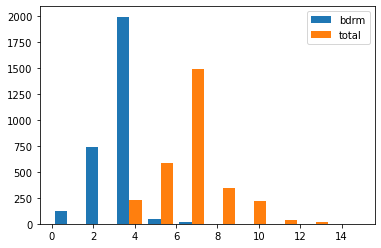

In [107]:
plt.hist([df['Bedroom AbvGr'], df['TotRms AbvGrd']], label=['bdrm', 'total'])
plt.legend(loc='upper right')
plt.show()

In [108]:
df[['Bedroom AbvGr','TotRms AbvGrd']].corr()

,Bedroom AbvGr,TotRms AbvGrd
Bedroom AbvGr,1.000000,0.672647
TotRms AbvGrd,0.672647,1.000000


In [109]:
df_rooms=df[['Bedroom AbvGr','TotRms AbvGrd']]

In [110]:
df['TotRms AbvGrd']-df['Bedroom AbvGr']

0       4
1       3
2       3
3       5
4       3
       ..
2925    3
2926    3
2927    3
2928    4
2929    6
Length: 2930, dtype: int64

In [111]:
df_rooms['var']=df_rooms['TotRms AbvGrd']-df_rooms['Bedroom AbvGr']

<ipython-input-111-f307695895d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rooms['var']=df_rooms['TotRms AbvGrd']-df_rooms['Bedroom AbvGr']


In [117]:
df_rooms.head()

,Bedroom AbvGr,TotRms AbvGrd,var
0,3,7,4
1,2,5,3
2,3,6,3
3,3,8,5
4,3,6,3


<AxesSubplot:xlabel='var,Bedroom AbvGr'>

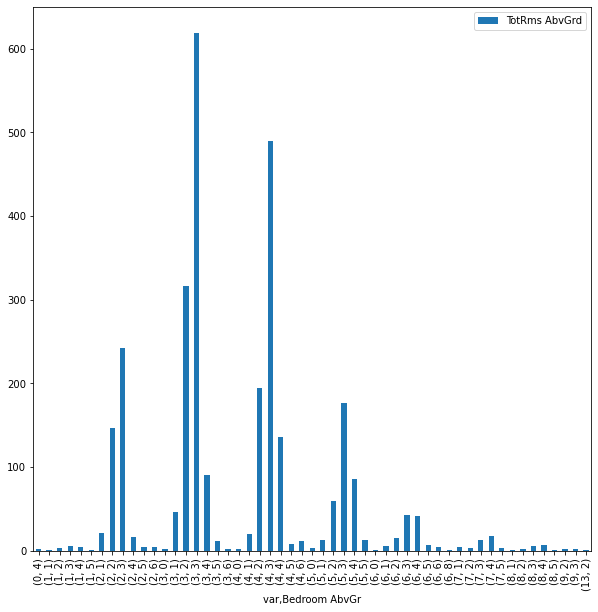

In [112]:
df_rooms.groupby(['var','Bedroom AbvGr']).count().plot(kind='bar',figsize=(10,10))


In [52]:
df_rooms.groupby(['var','Bedroom AbvGr']).count()

TotRms AbvGrd
var Bedroom AbvGr               
0   4                          2
1   1                          1
    2                          3
    3                          6
    4                          4
    5                          1
2   1                         21
    2                        147
    3                        242
    4                         16
    5                          4
    6                          4
3   0                          2
    1                         46
    2                        317
    3                        619
    4                         90
    5                         11
    6                          2
4   0                          2
    1                         20
    2                        194
    3                        490
    4                        136
    5                          8
    6                         11
5   0                          3
    1                         13
    2                         59
    3                        177
    4                         86
    5                         13
6   0                          1
    1                          6
    2                         15
    3                         43
    4                         41
    5                          7
    6                          4
    8                          1
7   1                          4
    2                          3
    3                         13
    4                         18
    5                          3
8   1                          1
    2                          2
    3                          5
    4                          7
    5                          1
9   2                          2
    3                          2
13  2                          1

In [100]:
col=['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch']
for i in col:
    print('number of records that have '+str(i)+' '+ str(np.count_nonzero(df[i])))

number of records that have Wood Deck SF 1404
number of records that have Open Porch SF 1630
number of records that have Enclosed Porch 459
number of records that have 3Ssn Porch 37
number of records that have Screen Porch 256


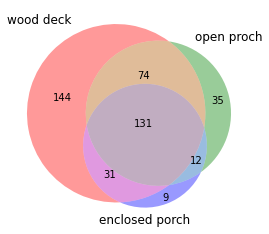

In [124]:
set1 = set(df['Wood Deck SF'])
set2 = set(df['Open Porch SF'])
set3 = set(df["Enclosed Porch"])

venn3([set1, set2, set3], ('wood deck', 'open proch', 'enclosed porch'))

plt.show()

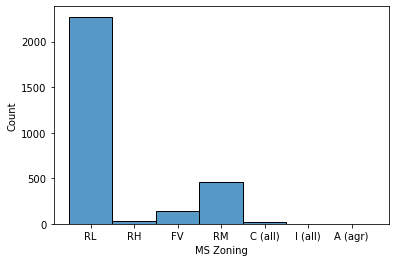

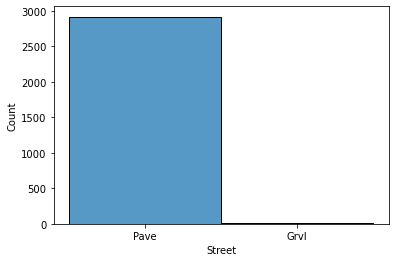

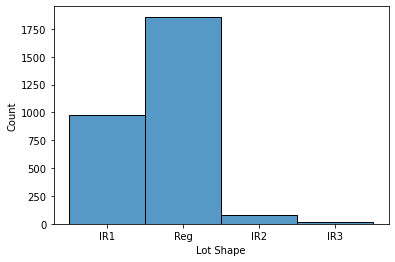

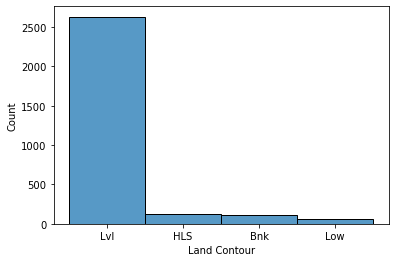

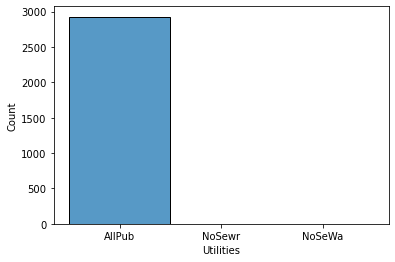

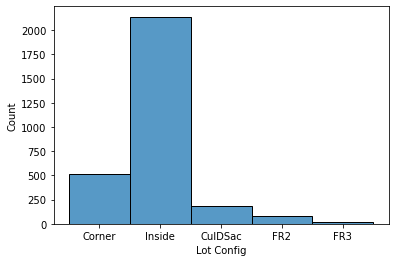

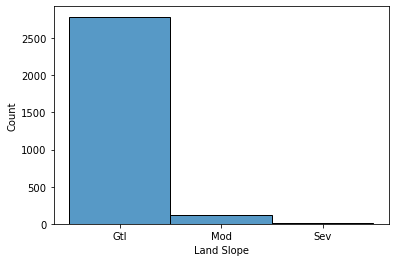

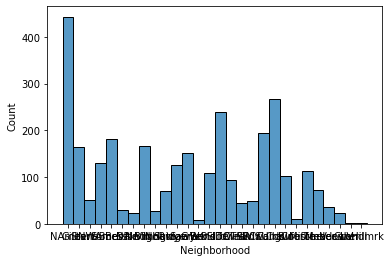

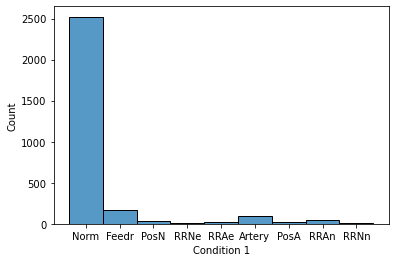

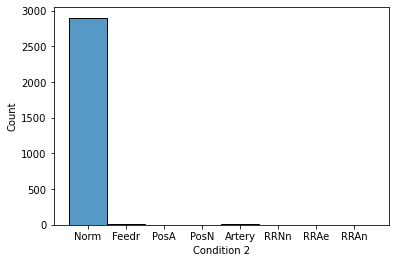

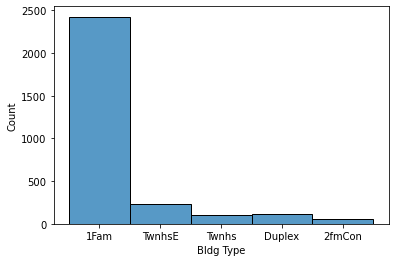

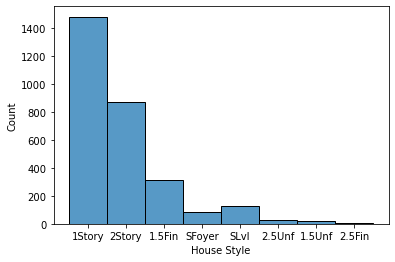

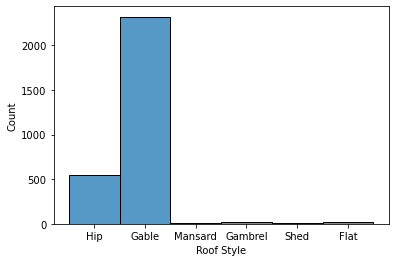

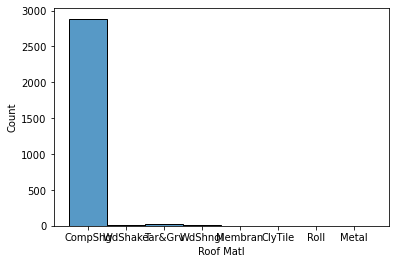

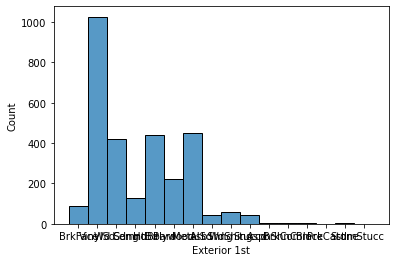

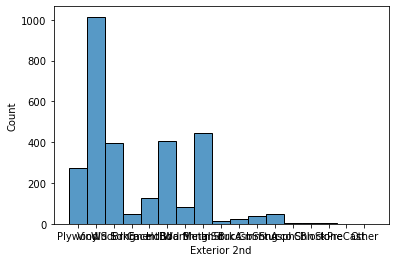

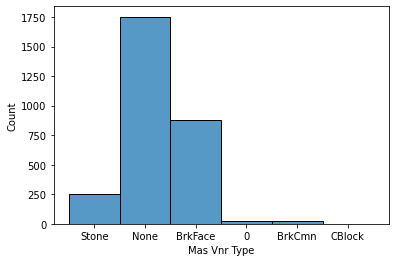

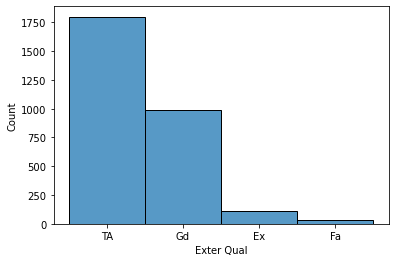

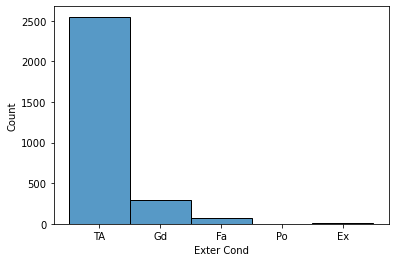

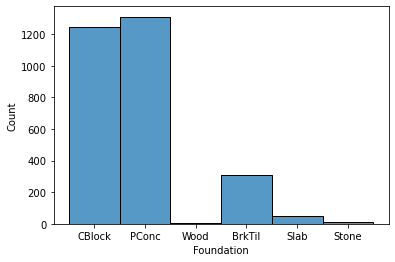

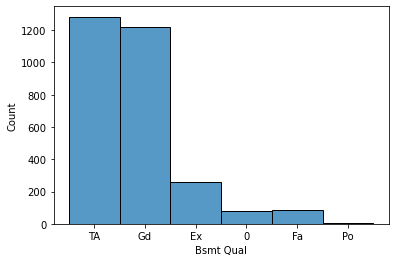

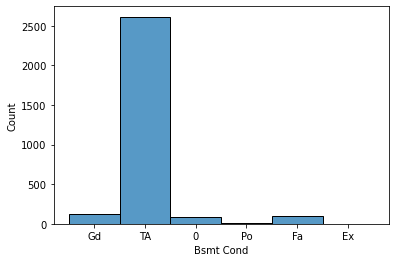

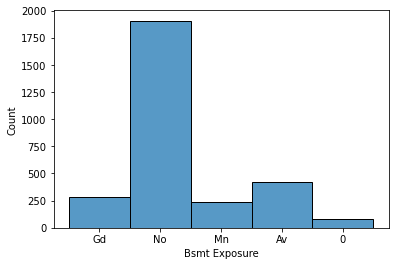

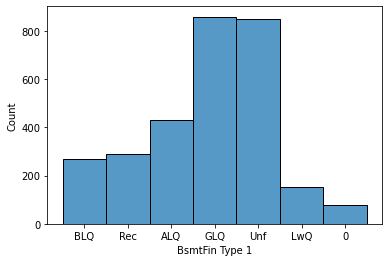

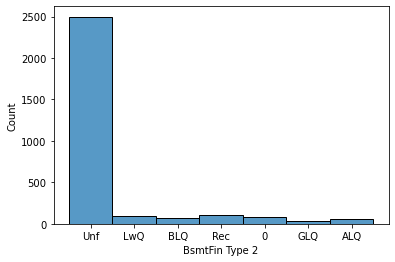

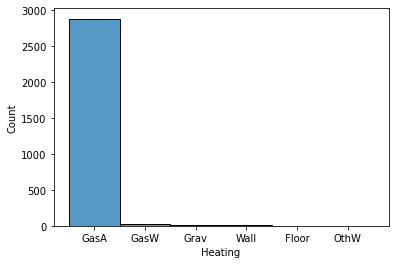

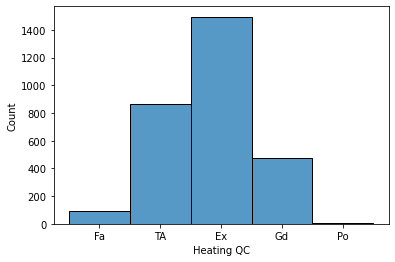

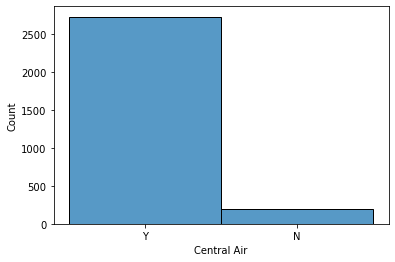

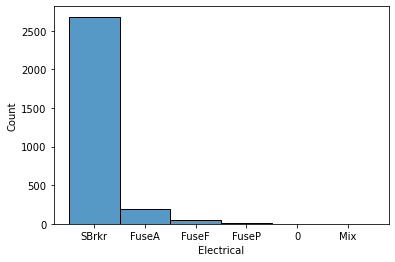

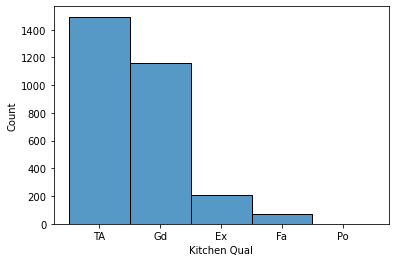

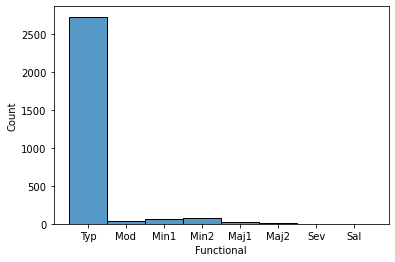

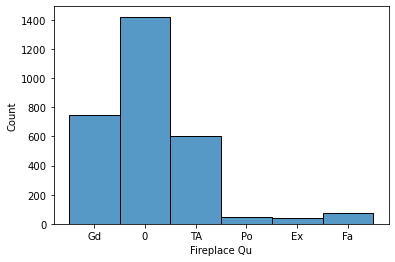

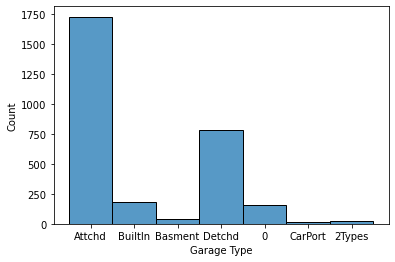

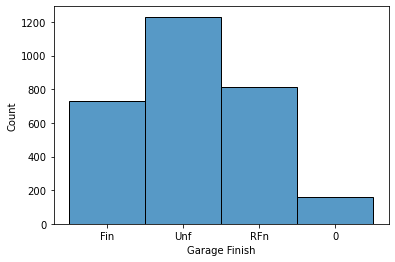

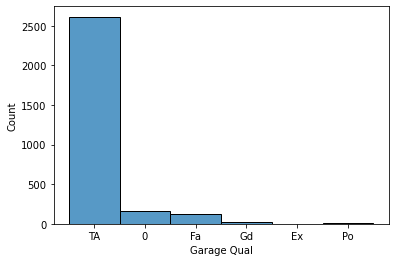

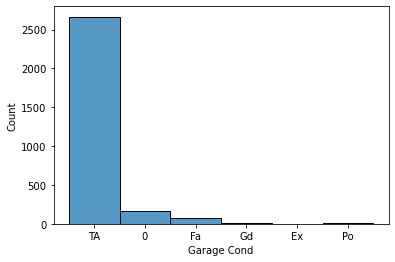

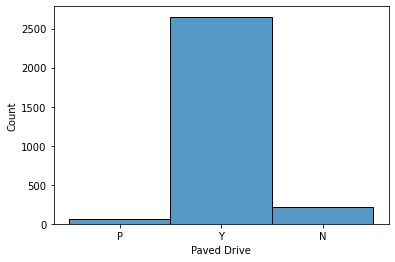

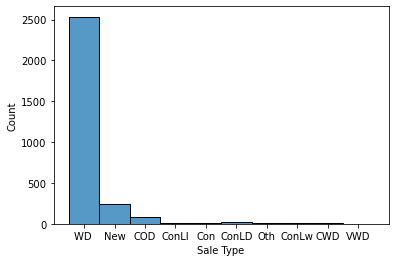

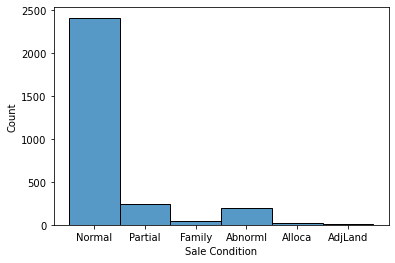

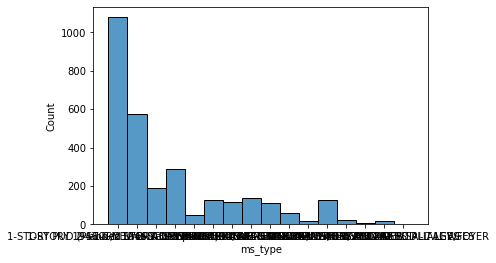

In [114]:
for c in df.columns:
    if df[c].dtype=='object':
        sns.histplot(data=df, x=c)
        plt.show()


In [116]:
df['Lot Config'].value_counts()

Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64

In [119]:
df[['Bsmt Full Bath', 'Bsmt Half Bath']]

,Bsmt Full Bath,Bsmt Half Bath
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
2925,1.0,0.0
2926,1.0,0.0
2927,0.0,1.0
2928,1.0,0.0


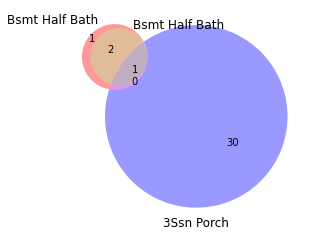

In [129]:
set1 = set(df['Bsmt Full Bath'])
set2 = set(df['Bsmt Half Bath'])
set3 = set(df['3Ssn Porch'])

venn3([set1, set2, set3], ('Bsmt Half Bath', 'Bsmt Half Bath','3Ssn Porch'))

plt.show()

In [130]:
df['Bsmt Full Bath'].value_counts()

0.0    1709
1.0    1181
2.0      38
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [131]:
df['Bsmt Half Bath'].value_counts()

0.0    2755
1.0     171
2.0       4
Name: Bsmt Half Bath, dtype: int64